In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from scipy.stats import sem, t
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm

import os
print(os.listdir("../input"))

['stock-price', 'loans-income']


***Source*: Book - Practical Statistics for Data Scientists. Code samples were translated from R to Python by me.**

# Table of Contents
1. [The Bootstrap](#The-Bootstrap)
>* [Definition of Bootstrap](#Definition-of-Bootstrap)
>* [Why Do We Use The Bootstrap](#Why-Do-We-Use-The-Bootstrap)
>* [The Algorithm For A Bootstrap](#The-Algorithm-For-A-Bootstrap)
>* [An Example of Using The Bootstrap](#An-Example-of-Using-The-Bootstrap)
2. [Types of Distributions](#Types-of-Distributions)
>* [Normal Distribution and QQ-plots](#Normal-Distribution-and-QQ-plots)
>* [Long-Tailed Distribution](#Long-Tailed-Distribution)
>* [Student's T-Distribution](#Student's-T-Distribution)
>* [Binomial Distribution](#Binomial-Distribution)
>* [Poisson and Related Distributions](#Poisson-and-Related-Distributions)
>>* [Poisson Distribution](#Poisson-Distribution)
>>* [Exponential Distributon](#Exponential-Distribution)
>>* [Weibull Distribution](#Weibull-Distribution)
3. [Summary](#Summary)

# The Bootstrap

## Definition of Bootstrap

One easy and effective way to estimate the sampling distributions of a statistic, or of model parameters, is to draw additional samples,with replacement, from the sample itself and recalculate the statistic or model for each resample. This procedure is called the **bootstrap**.

## Why Do We Use The Bootstrap

The bootstrap is used for sample size determination; experiment with different values for **n** *to see how the sampling distribution is affected*.

## The Algorithm For A Bootstrap

1. Draw a sample value, record, replace it.
2. Repeat n times.
3. Record the mean of the **n** resampled values.
4. Repeat steps 1-3 **R** times.
5. Use the **R** result to:
>* Calculate their standard deviation.
>* Produce a histogram or a boxplot.
>* Find a confidence interval.

## An Example of Using The Bootstrap

In [2]:
loans_income = np.array(pd.read_csv("../input/loans-income/loans_income.csv"))
loans_income[:5]

array([[ 67000],
       [ 52000],
       [100000],
       [ 78762],
       [ 37041]])

In [3]:
# Making a flat list from list of lists
loans_income = np.array([item for sublist in loans_income for item in sublist])

In [4]:
def bootstrap(l,R):
    n = len(loans_income)
    # Number of Bootstrap Samples
    means_of_boot_samples = []
    for reps in range(R):
        #Steps 1,2
        boot_sample = np.random.choice(loans_income, size = n)
        #Step 3
        means_of_boot_samples.append(round(np.mean(boot_sample), 3))
    return means_of_boot_samples

bootstrap(loans_income, 5)

[68593.791, 68575.402, 68710.676, 68847.57, 68915.562]

Now as we have a means of bootstrap samples we can estimate:

**A**. Their standard deviation (this estimates sample mean **standard error**)

In [5]:
np.std(bootstrap(loans_income, 100))

164.29605626102946

**B**. Produce a histogram or boxplot

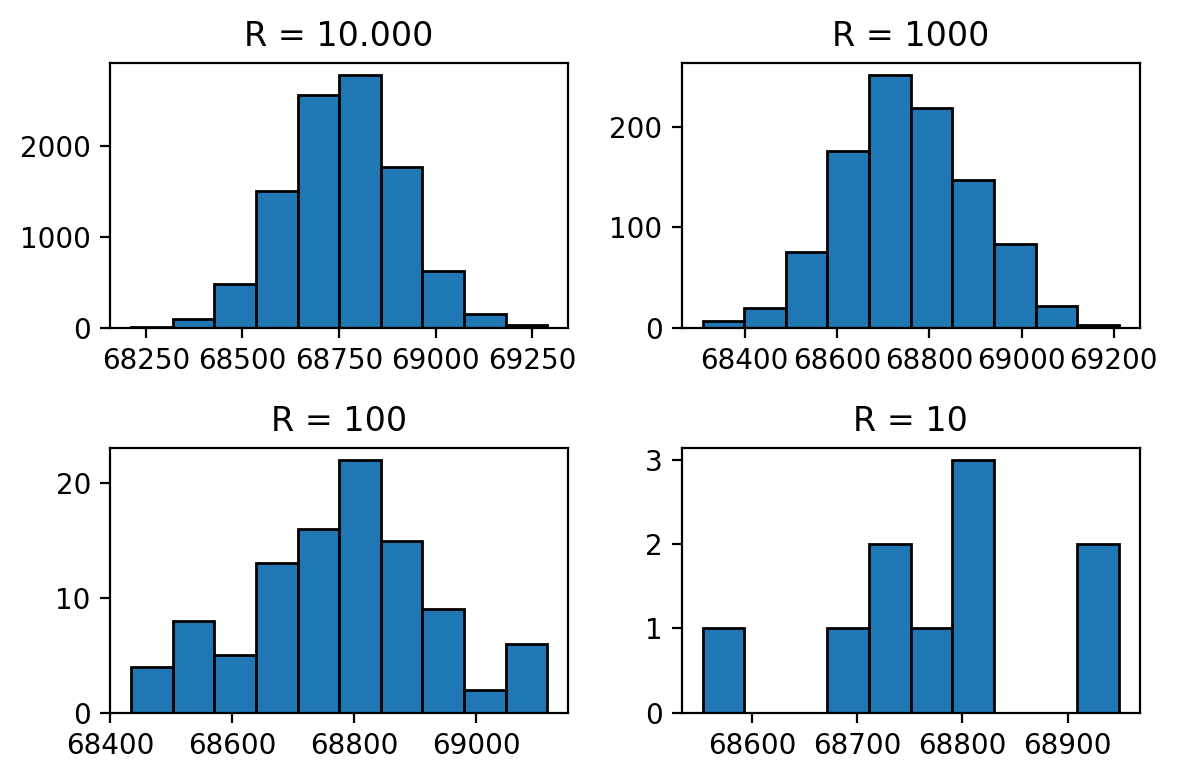

In [6]:
plt.figure(dpi = 200)

plt.subplot(221)
plt.title("R = 10.000")
plt.hist(bootstrap(loans_income, 10000), edgecolor = 'k')

plt.subplot(222)
plt.title("R = 1000")
plt.hist(bootstrap(loans_income, 1000), edgecolor = 'k')

plt.subplot(223)
plt.title("R = 100")
plt.hist(bootstrap(loans_income, 100), edgecolor = 'k')

plt.subplot(224)
plt.title("R = 10")
plt.hist(bootstrap(loans_income, 10), edgecolor = 'k')

plt.tight_layout()

As we can see distribution of 10000 means is more compact and bell-shaped than the distribution with smaller amount of means. This phenomenon is termed as **central limit theorem**.

**C.** Find a confidence interval.

In [7]:
data = bootstrap(loans_income, 1000)
lower_lim, upper_lim = np.percentile(data, 2.5), np.percentile(data, 95)
print("Lower Limit: ", lower_lim)
print("Upper Limit: ", upper_lim)

Lower Limit:  68476.444575
Upper Limit:  69019.3473


/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


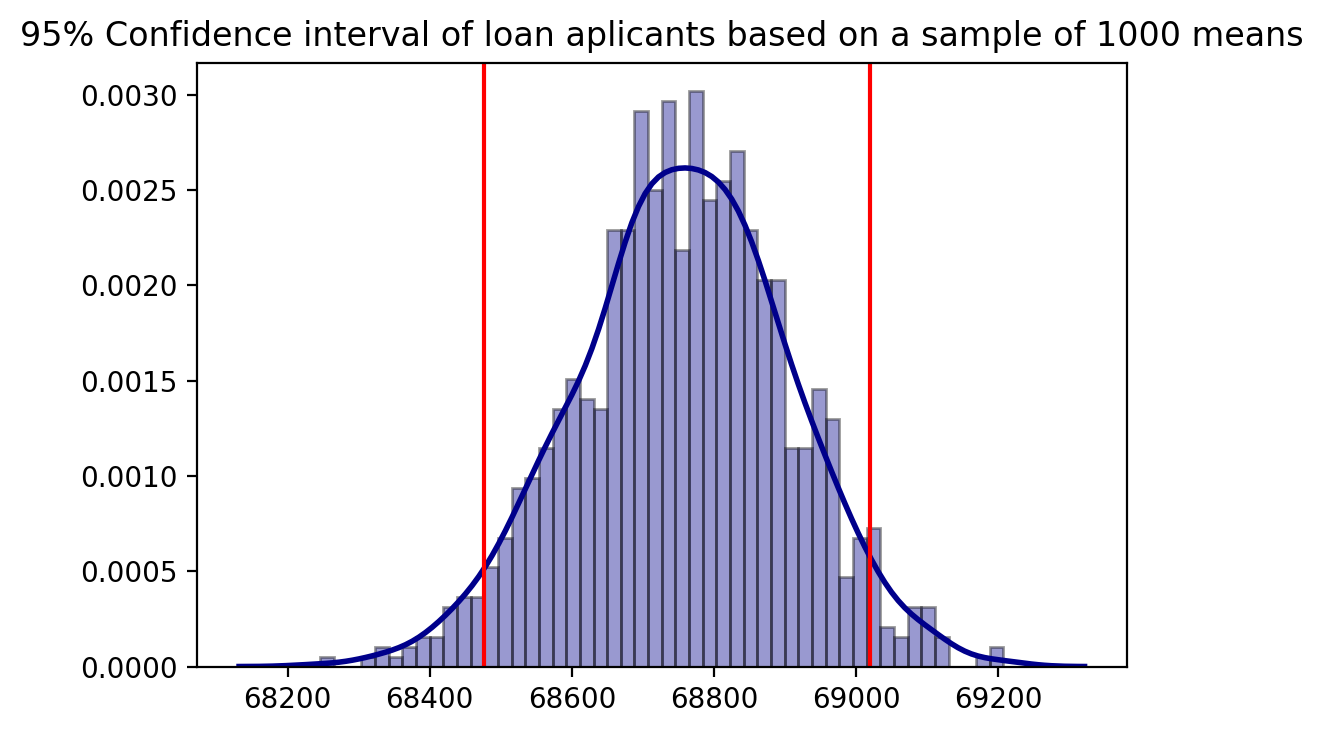

In [8]:
plt.figure(dpi = 200)
plt.title("95% Confidence interval of loan aplicants based on a sample of 1000 means")

sns.distplot(bootstrap(loans_income, 1000), hist=True, kde=True, 
             color = 'darkblue', bins = 50,
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 2})

plt.axvline(x=lower_lim,color='red')
plt.axvline(x=upper_lim,color='red')

# Types of Distributions

## Normal Distribution and QQ-plots

The bell-shaped ormal distribution is iconic in traditional statistics. In a normal distribution 68% of the data lies within one standard deviation of the mean, and 95% lies within two standard deviations.

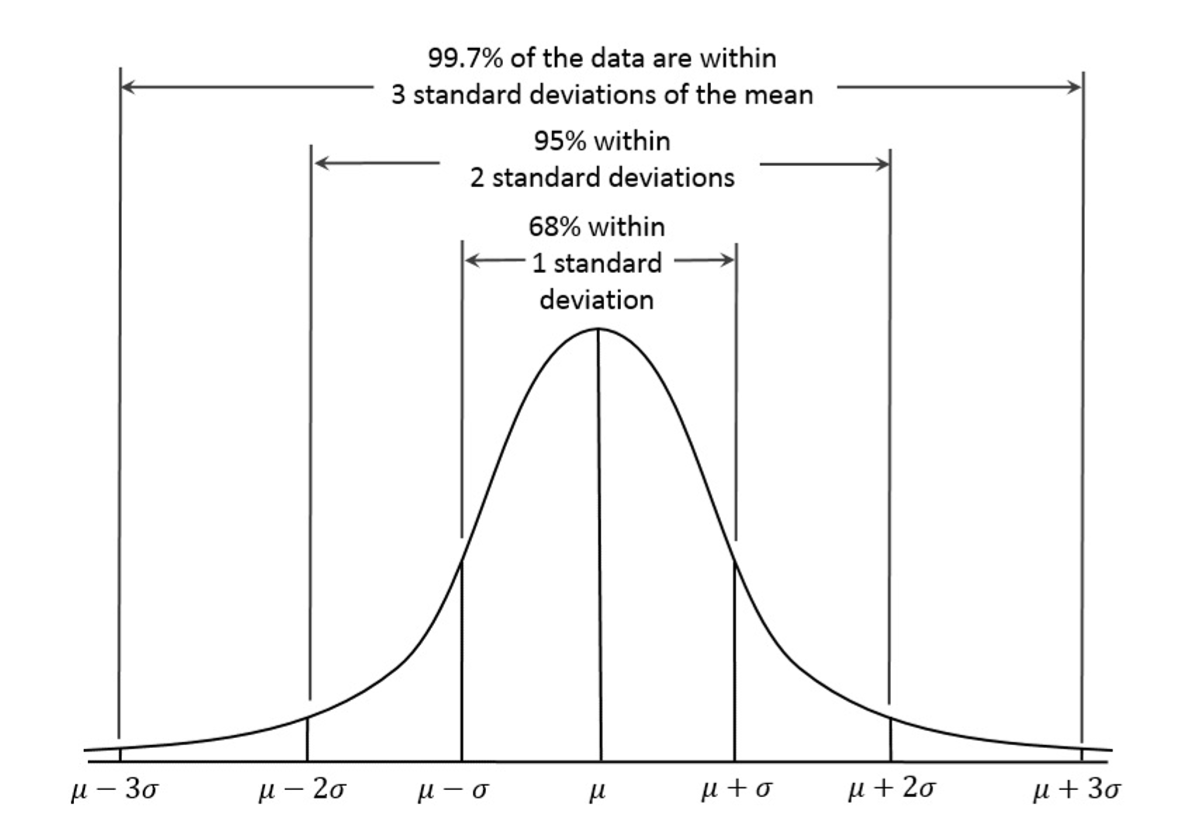

**Key terms**
* Error
> The difference between a data point and a predicted or average value.
* Standardize
> Subtract the mean and divide by the standard deviation.
* Z-score
> The result of standardizing an individual data point.
* Standard normal
> A normal distribution with mean = 0 and standard deviation = 1.
* QQ-plot
> A plot to visualize how close a sample distribution is to a normal distribution.

A **QQ-Plot** is used to visually determine how close a sample is to the normal distribution. The QQ-plot orders the z-scores from low to high, and plots each value's z-score on the y-axis; the x-axis is	the corresponding	quantile	of	a	normal	distribution	for	that	value’s	rank.	Since	the	data	is	normalized,	the units	correspond	to	the	number	of	standard	deviations	away	of	the	data	from	the	mean.	If	the	points roughly	fall	on	the	diagonal	line,	then	the	sample	distribution	can	be	considered	close	to	normal.	Figure	below	shows	a	QQ-Plot	for	a	sample	of	100	values	randomly	generated	from	a	normal	distribution;	as expected,	the	points	closely	follow	the	line.

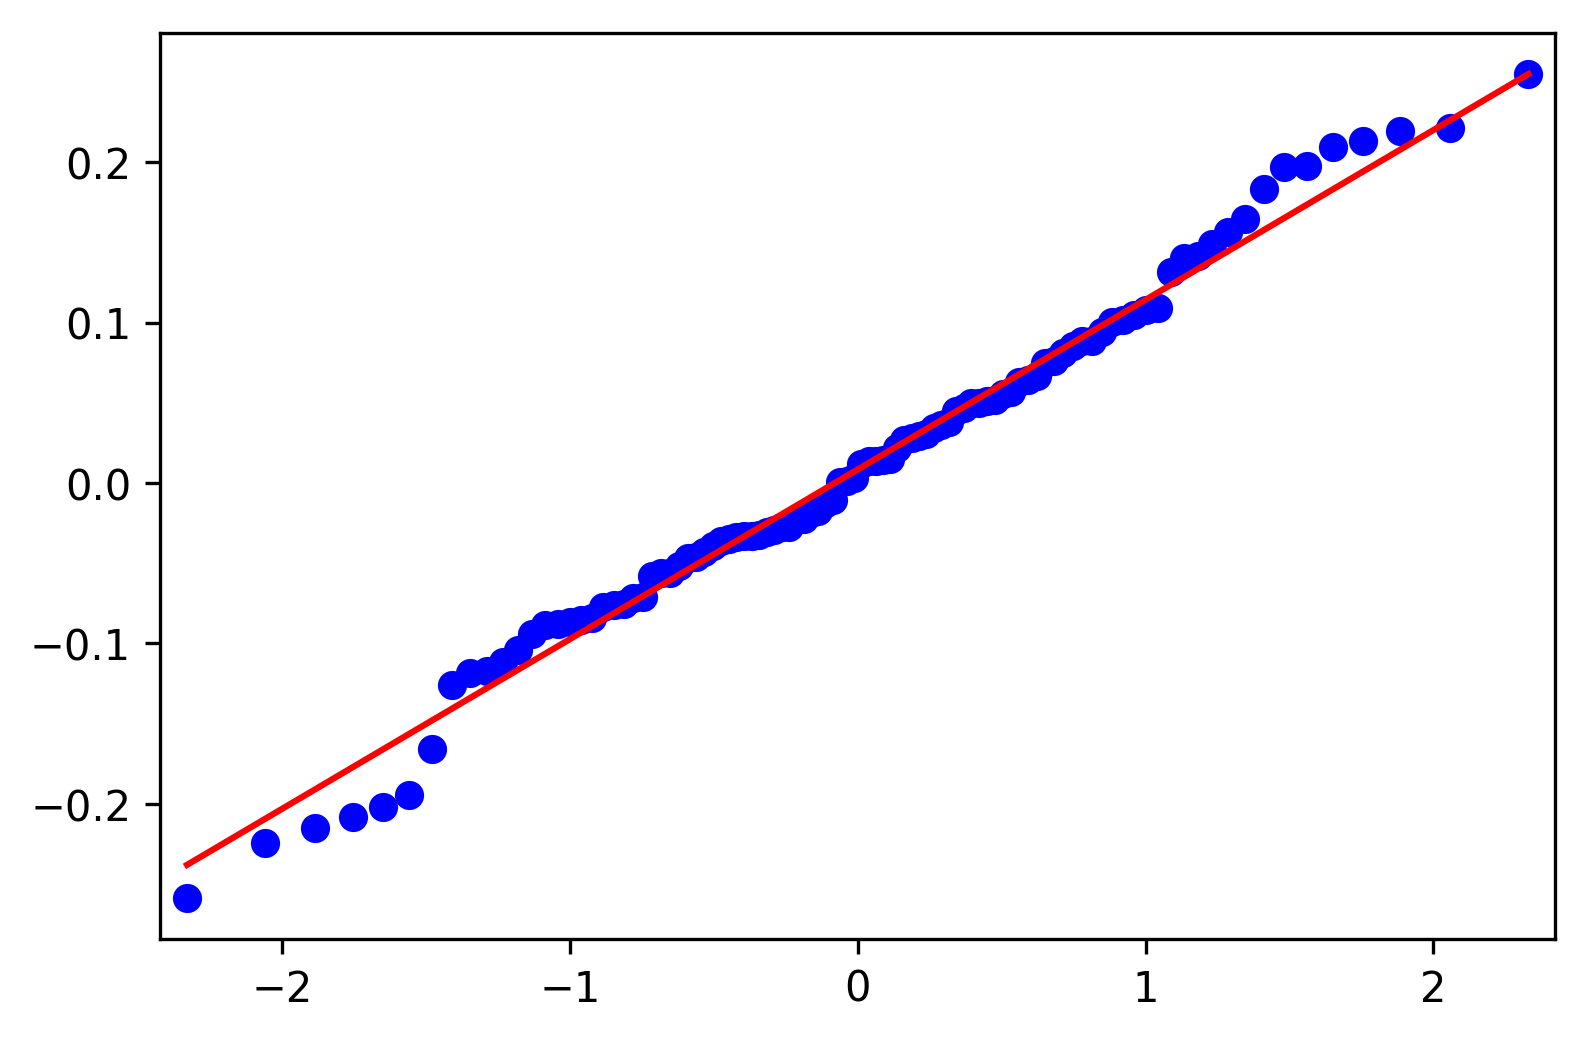

In [9]:
#  Genreating normal distribution (0 is the mean, 0.1 is the std, 100 is the quanity of values)
norm = np.random.normal(0,0.1,100)

# Plotting
fig, ax = plt.subplots(dpi = 300)
probplot = sm.ProbPlot(norm)
# We use semicolon ";" here to avoid plotting the same thing twice.
probplot.qqplot(line = 's', xlabel = "", ylabel = "", ax=ax);

## Long-Tailed Distribution

**Key terms**
* Tail
> The long narrow portion of a frequency distribution, where relatively extreme values occur at low frequency.
* Skew
> Where one tail of a distribution is longer than the other.

Despite the importance of normal distribution historically in statistics, and in contrast to what the name would suggest, data is generally not norally distributed. <br>
While the normal distribution is often appropriate and useful with respect to the distribution of errors and sample statistic, it typically does not characterize the distribution of raw data. Sometimes, the distribution is highly skewed (asymmetric), such as with income data, or the distribution can be discrete, as with binomial data. Both symmetric and asymmetric distributions may have longtails. The tails of distribution correspond to the extreme values (small and large). Long tails, and guarding against them, are widely recognized in practical work. <br>
<p>A good example to illustrate the long-tailed nature of data is stock returns.<br> Figure bellow shows the QQ-plot for the daily stock returns for Netflix.</p>

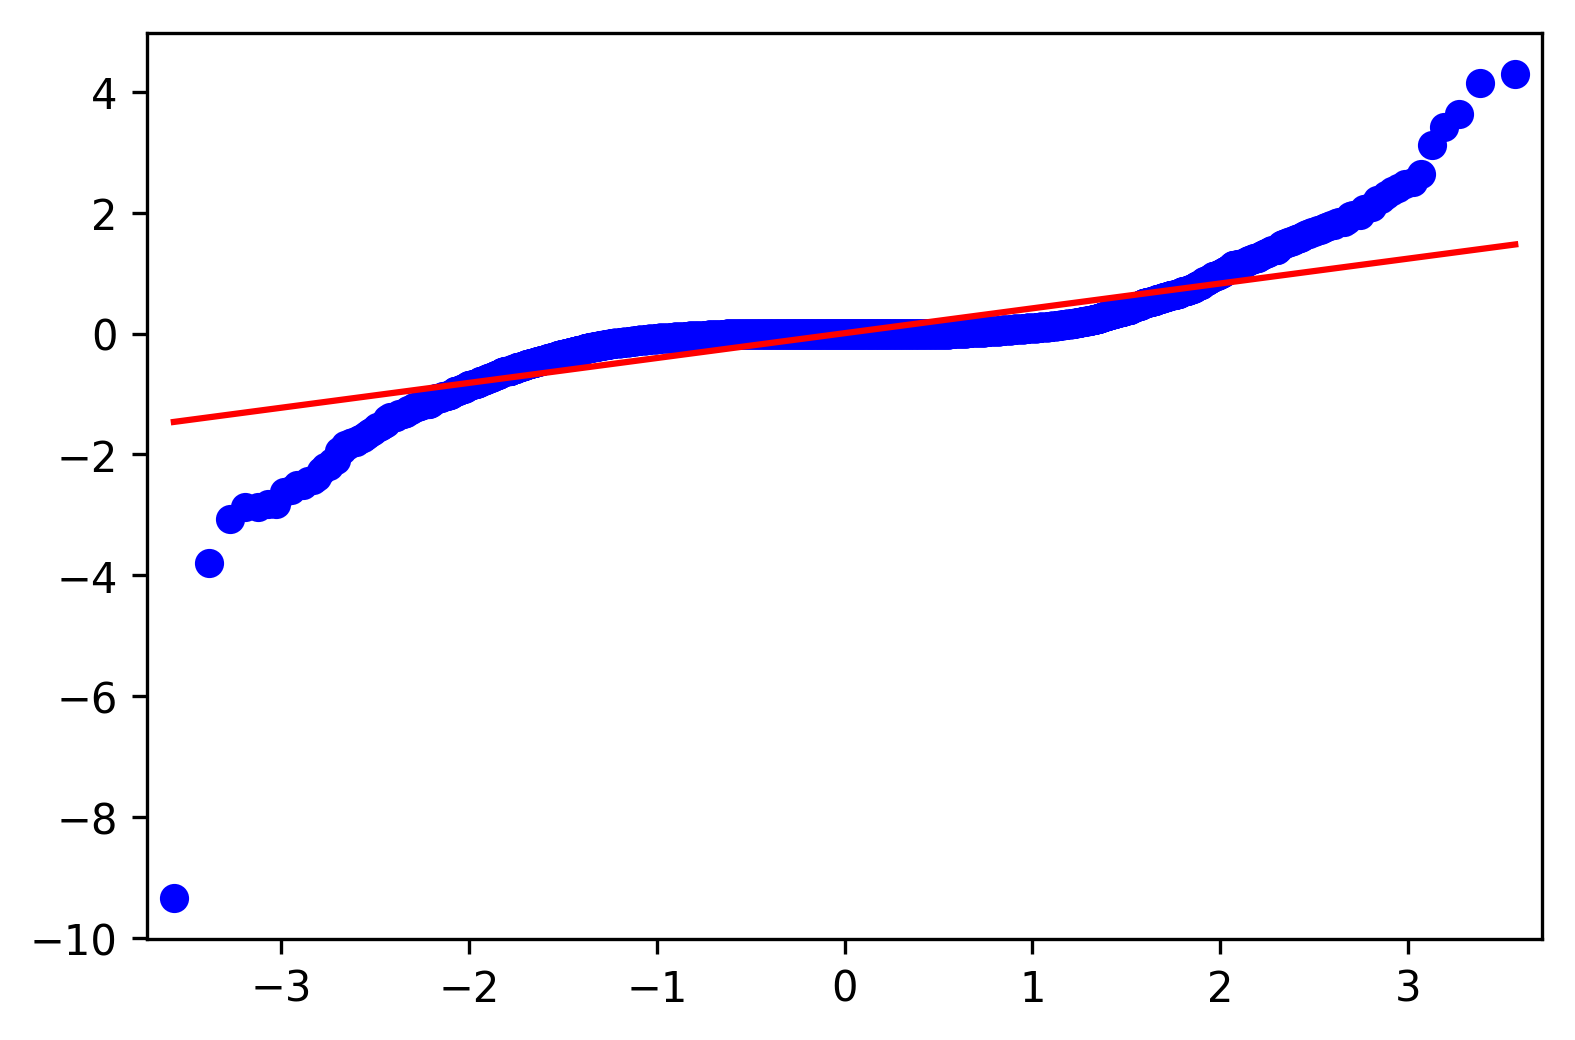

In [10]:
# Importing data
nflx = np.array(pd.read_csv("../input/stock-price/sp500_data.csv")["NFLX"])

# Plotting
fig, ax = plt.subplots(dpi = 300)
probplot = sm.ProbPlot(nflx)
# We use semicolon ";" here to avoid plotting the same thing twice.
probplot.qqplot(line = 's', xlabel = "", ylabel = "", ax=ax);

The points are far below the line for low values and far above the line for high values. This means that we are much more likely to observe extreme values than would be expected if the data had a normal distribution.

## Student's T-Distribution

The t-distribution is a normally shaped distribution, but a bit thicker and longer on the tails. Distributions of sample means are typically shaped like a t-distribution, and there is a family of t-distributions that differ depending on how large the sample is. The larger the sample, the more normally shaped the t-distribution becomes.
<p>
    The t-distribution is often called Stident's t because it was published in 1908 in Biometrika by W. S. Gosset under the name "Student" 

## Binomial Distribution

**Key terms**
* Trial
> An event with a discrete outcome (e.g. a coin flip).
* Success 
> The outcome of interest for a trial.
* Binomial
> Having two outcomes
* Binomial trial
> A trial with two outcomes
* Binomial distribution
> Distribution of number of successes in x trials

Yes/no (binomial) outcomes lie at the heart of analytics since they are often the culmination of a decision or oter process; buy/don't buy, click/don't click, survive/die. and so on. Central to understanding the binomial distribution is the idea of a set of trials, each trial having two possible outcome with definite probabilities.
<p>For example, flipping a coin 10 times is a binomial experiment with 10 trials, each trial having two possible outcomes (heads or tails). Such yes/no outcomes are termed binary outcomes.</p>
<p>The binomial distribution is the frequency distribution of the number of successes (*x*) in a given number of trials (*n*) with specified probability (*p*)of sucess in each trial.
<br>The binomial distribution would answer a question like:
> if the probability of a click converting to a sale is 0.02, what is the probability of observing 0 sales in 200 clicks?
<p>The Python function *numpy.random.binomial* calculates binomial probabilites. For example:

In [11]:
# n = 200, p = 0.02, x = ?
print("x(number of sucesses): ", np.random.binomial(200, 0.02))

x(number of sucesses):  5


The mean of a binomial distribution is *n* x *p* <br>
The variance is *n* x *p*(1-*p*)

## Poisson and Related Distributions

Many processes produce events randomly at a given overall rate-visitors arriving at a website, car arriving at a toll plaza (events spread over time), imperfection in a square meter of fabric, or typos per 100 lines of code (events spread over space).

**Key terms**
* Lambda
> The rate (per unit of time or space) at which event occurs.
* Poisson distribution
> The frequency distribution of the number of events in sampled units of time or space.
* Exponential distribution
> The frequency distribution of the time or distance from one event to the next event.
* Weibull distribution
> A generalized verion of the exponential, in which the event rate is allowed to shift over time.


### Poisson Distribution


From prior data we can estimate the average number of events per unit of time or space, but we might also want to know how different this might be from one unit of time/space to another. The Poisson distribution tells us the distribution of events per unit of time or space when we sample many such units. It is useful when addressing queuing questions like "How much capacity do we need to be 95% sure of fully processing the internet traffic that arrive on a server in any 5 seconds.
<p>
    The key parameter in a Poisson distribution is **λ**, or lambda. This is the mean number of events that occurs in a specified interval of time or space. The variance of Poisson distribution is also **λ**.
<p>
    A common technique is to generate random numbers from Poisso distribution as part of queuing simulation. The *numpy.random.poisson* function in Python does this, taking only two arguments-lambda and the quanity of random numbers to sought.

In [12]:
np.random.poisson(2, 100)

array([5, 3, 4, 1, 2, 2, 6, 1, 0, 1, 1, 0, 3, 2, 1, 3, 3, 2, 3, 3, 3, 1,
       3, 1, 1, 2, 2, 4, 0, 3, 1, 2, 5, 3, 0, 1, 1, 2, 2, 1, 2, 3, 2, 2,
       3, 2, 3, 2, 1, 1, 1, 1, 3, 3, 2, 0, 1, 0, 4, 4, 0, 2, 1, 3, 1, 2,
       5, 1, 6, 3, 1, 2, 5, 1, 1, 0, 2, 2, 2, 2, 2, 3, 1, 2, 2, 5, 0, 1,
       2, 0, 1, 1, 2, 2, 5, 1, 2, 1, 2, 2])

The code above generates 100 random numbers from a Poisson distribution with λ = 2. For example, if incoming customer service calls average 2 per minute, this code will simulate 100 minutes, returning the number of calls in each of those 100 minutes.

### Exponential Distrbution

Using the same parameter *λ* that we used in the Poisson distribution, we can also model the distribution of the time between events: time between visits to a website or between cars arriving at a toll plaza. It is also used in engineering to model time to failure, and in process managment to model, for example, the time required per service call. The Python code to generate random numbers from an exponential distribution takes two arguments *szie* (the quanity of numbers to be generated), and *rate* (*λ*), the number of events per time period. <p>For example:

In [13]:
np.random.exponential(.2, 100)

array([6.54229610e-03, 1.44238141e-01, 4.76463674e-02, 5.99933604e-02,
       1.95671424e-01, 1.05728314e-01, 3.02072318e-02, 5.46093253e-02,
       9.11980550e-02, 2.94304999e-01, 1.90117842e-01, 3.64827359e-01,
       1.98290449e-02, 7.22894873e-02, 1.77630886e-01, 4.53483090e-02,
       9.40441890e-02, 3.20537199e-01, 2.88989781e-01, 1.02390634e-01,
       9.98502485e-02, 3.45207717e-01, 1.19557329e-01, 7.30874544e-02,
       1.95910961e-01, 3.85827721e-01, 2.15191569e-01, 7.24854708e-02,
       6.05712789e-01, 2.20819625e-01, 1.90731061e-01, 2.19500667e-01,
       3.50599170e-01, 2.63681445e-01, 4.11654576e-01, 2.44751501e-01,
       2.20741058e-01, 7.94821290e-01, 5.44855462e-02, 3.66085504e-02,
       4.85382368e-01, 3.40141185e-01, 4.13903122e-05, 1.68907705e-01,
       5.41832462e-02, 7.42658115e-02, 8.70503043e-02, 1.16631238e-01,
       7.33219552e-01, 1.93077394e-01, 1.19404422e-01, 1.00088305e-01,
       3.58469231e-02, 3.70587921e-01, 1.12759528e+00, 9.49847384e-02,
      

This code generates 100 random numbers from an exponential distribution where the mean number of events per time is 0.2. So you could use it to simulate 100 intervals, in minutes, between service calls, where the average rate of incoming calls is 0.2 per minute.

### Weibulll distribution

In many cases, the event rate does not remain constant over time. If the period over which it changes is much longer than typical interval between events, there is no problem; you just subdivide the analysis into segments where rates are relatively constant, as mentioned before. If, however, the event rate changes over the time of the interval, the Exponential (or Poisson) distributions are not longer useful. This is likely to be the case in mechanical failure-the risk of failure increases as time goes by. The Weiblull distribution is an extensions of the exponential distribution, in which the event rate is allowed to change, as specified by a shape parameter, *β*. If *β*>1, the probability of an event increases over time, if *β*<1, it decreases. 
<p>
    The Python code numpy.random.weibull() generates random numbers from a Weibull distribution takes two arguments, *shape* and *size* (the quanity of numbers to be generated).
</p>
For example, the following code generates 100 random numbers from a Weibull distribution with shape of 1.5 .

In [14]:
np.random.weibull(1.5, 100)

array([5.03733943e-01, 1.89398695e-01, 1.61649299e+00, 1.11685699e+00,
       9.33229739e-01, 2.73227676e-01, 4.00494123e-01, 8.79659853e-01,
       7.80534650e-01, 1.02967388e+00, 6.11046238e-01, 1.27650843e+00,
       2.08491594e+00, 4.31223971e-01, 1.44466496e+00, 7.95780587e-01,
       5.38119931e-01, 9.77761177e-01, 3.84089973e-01, 1.35594029e+00,
       1.11139904e+00, 2.06500324e-01, 3.66087590e-01, 4.41839865e-01,
       1.01964141e+00, 4.79125714e-01, 1.04681133e+00, 1.37958239e+00,
       2.12842050e-01, 7.92747377e-01, 9.71952459e-01, 1.41519937e-01,
       9.56495309e-01, 5.21164232e-01, 6.53561267e-01, 1.24997410e+00,
       5.81357861e-01, 9.27884960e-02, 6.33230168e-01, 9.50526073e-01,
       5.43735107e-01, 5.08607307e-01, 2.12727411e+00, 7.39996850e-01,
       4.92354916e-01, 1.89067322e-02, 8.10921549e-01, 5.80008887e-01,
       7.33919236e-01, 2.84000794e-03, 4.21338114e-01, 9.44192208e-01,
       2.90956193e+00, 1.29793013e+00, 1.03453648e+00, 7.42475307e-01,
      

# Summary

In the era of big data, the principles of random sampling remain important  when  accurate  estimates  are needed.  Random  selection  of  data  can  reduce  bias  and  yield  a  higher  quality  data  set  than  would  result from  just  using  the  conveniently  available  data.  Knowledge  of  various  sampling  and  data  generating distributions  allows  us  to  quantify  potential  errors  in  an  estimate  that  might  be  due  to  random  variation.  At the  same  time,  [the bootstrap](#The-Bootstrap)  (sampling  with  replacement  from  an  observed  data  set)  is  an  attractive  “one size  fits  all”  method  to  determine  possible  error  in  sample  estimates.  
